In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 3.6 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.4-py3-none-any.whl size=16677 sha256=ef6ae4adb5285c52e6d4ab9cbe7d60cc986186ad28aaceba3853dfdded24aabd
  Stored in directory: /root/.cache/pip/wheels/41/01/29/deaa71fe596f8d857e57c4fb388db8861e23e6ed0b03204dcb
Successfully built pandarallel


In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import json
import re
from pandarallel import pandarallel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [13]:
dataset0 = pd.read_csv("/content/drive/MyDrive/ds5230project/tmdb_5000_movies.csv")
dataset1 = pd.read_csv("/content/drive/MyDrive/ds5230project/tmdb_5000_credits.csv")
movies = dataset0.merge(dataset1, left_on='id', right_on='movie_id')   
movies.rename(columns={'title_y': 'title'}, inplace=True)
#dataset0
dataset1
#movies     

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [ ]:
dataset0 = pd.read_csv("tmdb_5000_movies.csv")
dataset1 = pd.read_csv("tmdb_5000_credits.csv")
movies = dataset0.merge(dataset1, left_on='id', right_on='movie_id')   
movies.rename(columns={'title_y': 'title'}, inplace=True)
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,Newlyweds,"[{"

In [42]:
pandarallel.initialize()

def get_director(crew_data):
    crew = json.loads(crew_data)
    for member in crew:
        if member['job'] == 'Director':
            return member['name']
    return np.nan

movies['director'] = movies['crew'].apply(get_director)

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'\W', ' ', text)
        text = text.lower()
        text = re.sub(r'\s+[a-z]\s+', ' ', text)
        text = re.sub(r'^[a-z]\s+', ' ', text)
        text = re.sub(r'\s+', ' ', text)
    return text

def combine_features(row):
    features = ['genres', 'keywords', 'overview', 'cast', 'director']
    return ' '.join([str(row[feature]) for feature in features])

movies['genres'] = movies['genres'].parallel_apply(preprocess_text)
movies['keywords'] = movies['keywords'].parallel_apply(preprocess_text)
movies['overview'] = movies['overview'].parallel_apply(preprocess_text)
movies['cast'] = movies['cast'].parallel_apply(preprocess_text)
movies['director'] = movies['director'].parallel_apply(preprocess_text)
movies['combined_features'] = movies.parallel_apply(combine_features, axis=1)
output_path = "/content/drive/MyDrive/ds5230project/preprocessed_tmdb_movies.csv"
movies.to_csv(output_path, index=False)

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(movies['combined_features'])

vectorizer.fit(movies['combined_features'])
text = vectorizer.transform(movies['combined_features'])


cosine_sim = cosine_similarity(tfidf_matrix)

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores= sim_scores[1:11]
    score = list((cosine_sim[idx]))
    score = sorted(score, reverse=True)
    score= score[1:11]
    movie_indices = [i[0] for i in sim_scores]
    recommendations = movies['title'].iloc[movie_indices]
    return pd.DataFrame({'Title':recommendations,
                         'score':score  
                         
                        })


INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [43]:
tfidf_matrix.shape

(4803, 239979)

In [44]:
cosine_sim 

array([[1.        , 0.42963082, 0.49286011, ..., 0.21147153, 0.15351019,
        0.2142495 ],
       [0.42963082, 1.        , 0.44082827, ..., 0.20044492, 0.1392659 ,
        0.19953686],
       [0.49286011, 0.44082827, 1.        , ..., 0.21095358, 0.15989829,
        0.21863977],
       ...,
       [0.21147153, 0.20044492, 0.21095358, ..., 1.        , 0.07405724,
        0.10986608],
       [0.15351019, 0.1392659 , 0.15989829, ..., 0.07405724, 1.        ,
        0.07353699],
       [0.2142495 , 0.19953686, 0.21863977, ..., 0.10986608, 0.07353699,
        1.        ]])

In [47]:
movie_title = "Batman"
recommendations = get_recommendations(movie_title,cosine_sim)
print(f"Recommendations for {movie_title} from high to low:")
print(recommendations)

Recommendations for Batman from high to low:
                                   Title     score
3                  The Dark Knight Rises  0.477605
65                       The Dark Knight  0.473813
9     Batman v Superman: Dawn of Justice  0.456971
119                        Batman Begins  0.449662
1847                          GoodFellas  0.443540
72                         Suicide Squad  0.441298
365                              Contact  0.434902
361        You Don't Mess with the Zohan  0.432895
2418   Dickie Roberts: Former Child Star  0.430932
4216        Mr. Smith Goes to Washington  0.425387


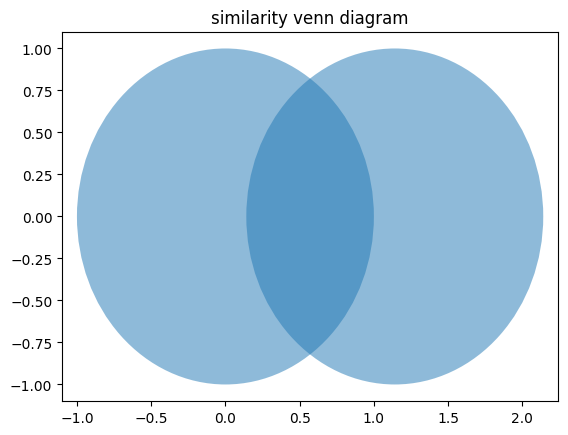

In [ ]:
import matplotlib.pyplot as plt

## output of your first part
cosine = cosine_sim

## set constants
r = 1
d = 2 * r * (1 - cosine[0][1])
plt.title('similarity venn diagram')
## draw circles
circle1=plt.Circle((0, 0), r, alpha=.5)
circle2=plt.Circle((d, 0), r, alpha=.5)
## set axis limits
plt.ylim([-1.1, 1.1])
plt.xlim([-1.1, 1.1 + d])
fig = plt.gcf()
fig.gca().add_artist(circle1)
fig.gca().add_artist(circle2)

fig.savefig('venn_diagramm.png')

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters


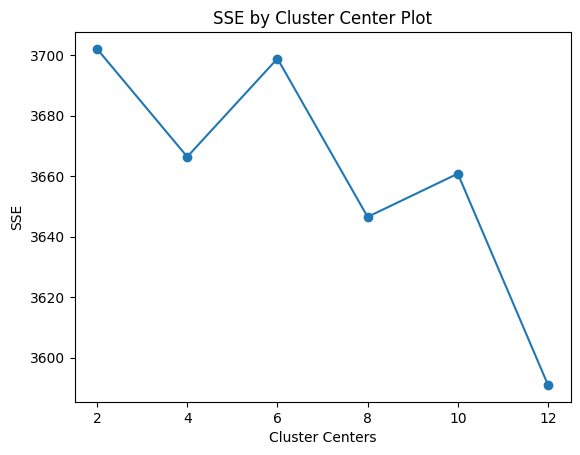

In [ ]:
find_optimal_clusters(text, 12)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=12, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

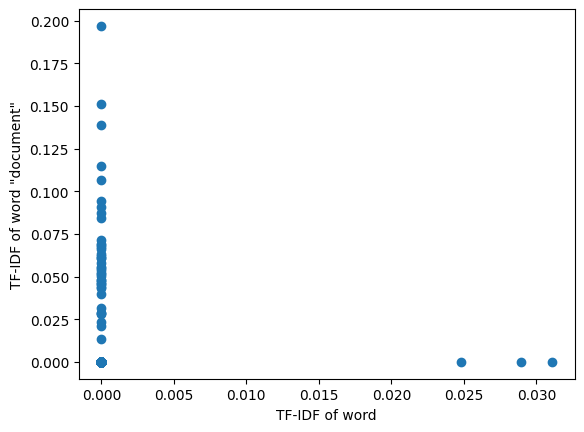

In [ ]:
tfidf_values = tfidf_matrix.toarray()

plt.scatter(tfidf_values[:,0], tfidf_values[:,1])
plt.xlabel('TF-IDF of word' )
plt.ylabel('TF-IDF of word "document"')
plt.show()

In [ ]:
tsne_model = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_vectors = tsne_model.fit_transform(tfidf_matrix.toarray())

In [ ]:

def get_tsne_plot(title):
  movie_index = movies[movies['title'] == title].index[0]
# Define the number of related movies to find
  k = 10

# Calculate the cosine similarity scores between the target movie and all other movies
  cosine_sim_scores = cosine_sim[movie_index]

# Find the indices of the top k similar movies
  top_k_indices = np.argsort(cosine_sim_scores)[:k]

# Get the t-SNE vectors for the top k similar movies
  top_k_vectors = tsne_vectors[-top_k_indices]

  plt.scatter(tsne_vectors[:,0], tsne_vectors[:,1] )
# Plot the target movie and its top k similar movies in a scatter plot
  plt.scatter(tsne_vectors[movie_index, 0], tsne_vectors[movie_index, 1], color='red', label='Target Movie')

  for i in range(k):
      plt.scatter(top_k_vectors[i, 0], top_k_vectors[i, 1], color='yellow', label="Similar Movie")

  plt.title('t-SNE plot for the movie recommendation system')
  leg = plt.legend(['Other movies', 'Target Movie', 'Similar Movie'], fontsize=8)
  colors=['#1f77b4', 'red','yellow']

  for i, j in enumerate(leg.legendHandles):
    j.set_color(colors[i])

  plt.show()


<ipython-input-15-a5fa3ec8916f>:26: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i, j in enumerate(leg.legendHandles):


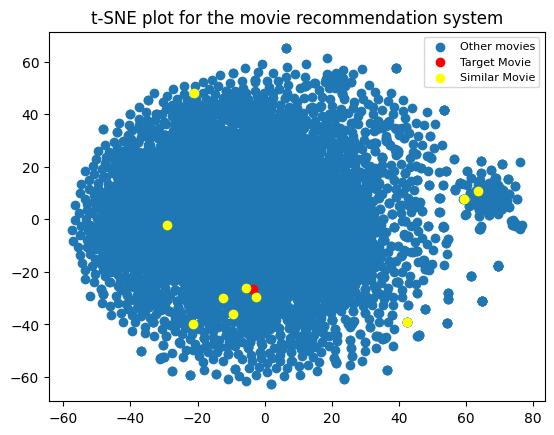

In [ ]:
get_tsne_plot('The Dark Knight')

### **Heres the traditional training and testing sets split for experiment purpose in this project like the urbric asked, it is not effciency compare to the above solution**

In [17]:
dataset3 = pd.read_csv("/content/drive/MyDrive/ds5230project/preprocessed_tmdb_movies.csv")
dataset3

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title_x,vote_average,vote_count,movie_id,title,cast,crew,director,combined_features
0,237000000,id 28 name action id 12 name adventure id 14 ...,http://www.avatarmovie.com/,19995,id 1463 name culture clash id 2964 name futur...,en,Avatar,in the 22nd century paraplegic marine is dispa...,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,cast_id 242 character jake sully credit_id 56...,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",james cameron,id 28 name action id 12 name adventure id 14 ...
1,300000000,id 12 name adventure id 14 name fantasy id 28...,http://disney.go.com/disneypictures/pirates/,285,id 270 name ocean id 726 name drug abuse id 9...,en,Pirates of the Caribbean: At World's End,captain barbossa long believed to be dead has ...,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,cast_id 4 character captain jack sparrow cred...,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",gore verbinski,id 12 name adventure id 14 name fantasy id 28...
2,245000000,id 28 name action id 12 name adventure id 80 ...,http://www.sonypictures.com/movies/spectre/,206647,id 470 name spy id 818 name based on novel id...,en,Spectre,cryptic message from bond past sends him on t...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,cast_id 1 character james bond credit_id 52fe...,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",sam mendes,id 28 name action id 12 name adventure id 80 ...
3,250000000,id 28 name action id 80 name crime id 18 name...,http://www.thedarkknightrises.com/,49026,id 849 name dc comics id 853 name crime fight...,en,The Dark Knight Rises,following the death of district attorney harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,cast_id 2 character bruce wayne batman credit...,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",christopher nolan,id 28 name action id 80 name crime id 18 name...
4,260000000,id 28 name action id 12 name adventure id 878...,http://movies.disney.com/john-carter,49529,id 818 name based on novel id 839 name mars i...,en,John Carter,john carter is war weary former military capta...,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,cast_id 5 character john carter credit_id 52f...,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",andrew stanton,id 28 name action id 12 name adventure id 878...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,id 28 name action id 80 name crime id 53 name...,NaN,9367,id 5616 name united states u2013mexico barrie...,es,El Mariachi,el mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,El Mariachi,cast_id 1 character el mariachi credit_id 52f...,"[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",robert rodriguez,id 28 name action id 80 name crime id 53 name...
4799,9000,id 35 name comedy id 10749 name romance,NaN,72766,,en,Newlyweds,newlywed couple honeymoon is upended by the a...,0.642552,[],...,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,Newlyweds,cast_id 1 character buzzy credit_id 52fe487dc...,"[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",edward burns,id 35 name comedy id 10749 name romance n...
4800,0,id 35 name comedy id 18 name drama id 10749 n...,http://www.hallma

In [14]:
def combine_features(row):
    return row['keywords'] + ' ' + row['overview'] + ' ' + row['cast'] + ' ' + row['crew']



### **k-NN for comparing**

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors


In [27]:
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(dataset3['combined_features'])


In [28]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(count_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [33]:
def get_knn_recommendations(movie_title, k=10):
    movie_index = dataset3[dataset3['title'] == movie_title].index[0]
    distances, indices = knn_model.kneighbors(count_matrix[movie_index], n_neighbors=k+1)
    recommended_movies = dataset3.iloc[indices[0]].sort_values(by='popularity', ascending=False)
    return recommended_movies['title'][1:]


In [48]:
movie_title = "Batman"
recommendations = get_knn_recommendations(movie_title)
print(f"Recommendations for {movie_title}:")
print(recommendations)


Recommendations for Batman:
183     The Hunger Games: Catching Fire
1702                           Die Hard
1102                               Argo
1103                       The Fugitive
446                             Con Air
1359                             Batman
2024                             Gandhi
870                         Superman II
1874                        August Rush
765                       Almost Famous
Name: title, dtype: object


In [49]:
movie_title = "Batman"
recommendations = get_recommendations(movie_title,cosine_sim)
print(f"Recommendations for {movie_title} from high to low:")
print(recommendations)

Recommendations for Batman from high to low:
                                   Title     score
3                  The Dark Knight Rises  0.477605
65                       The Dark Knight  0.473813
9     Batman v Superman: Dawn of Justice  0.456971
119                        Batman Begins  0.449662
1847                          GoodFellas  0.443540
72                         Suicide Squad  0.441298
365                              Contact  0.434902
361        You Don't Mess with the Zohan  0.432895
2418   Dickie Roberts: Former Child Star  0.430932
4216        Mr. Smith Goes to Washington  0.425387


In [46]:
def calculate_overlap(movie_title):
    recommendations_knn = get_knn_recommendations(movie_title)
    recommendations_previous = get_recommendations(movie_title)['Title'].tolist()

    overlap = set(recommendations_knn) & set(recommendations_previous)
    overlap_percentage = len(overlap) / min(len(recommendations_knn), len(recommendations_previous)) * 100

    return overlap_percentage

# Set the global movies DataFrame and cosine_sim matrix to the preprocessed dataset
movies = dataset3
cosine_sim = cosine_similarity(tfidf_matrix)

movie_title = "Batman"
overlap = calculate_overlap(movie_title)
print(f"Overlap between k-NN and the previous method for '{movie_title}': {overlap:.2f}%")





Overlap between k-NN and the previous method for 'Batman': 0.00%


In [51]:
def calculate_diversity(recommendations, cosine_sim):
    diversity = 0
    num_pairs = 0

    for i in range(len(recommendations)):
        for j in range(i + 1, len(recommendations)):
            diversity += (1 - cosine_sim[recommendations[i], recommendations[j]])
            num_pairs += 1

    return diversity / num_pairs if num_pairs > 0 else 0

recommendations_previous = get_recommendations("Batman")['Title'].tolist()
recommendations_knn = get_knn_recommendations("Batman")

previous_indices = [movies[movies['title'] == title].index[0] for title in recommendations_previous]
knn_indices = [movies[movies['title'] == title].index[0] for title in recommendations_knn]

diversity_previous = calculate_diversity(previous_indices, cosine_sim)
diversity_knn = calculate_diversity(knn_indices, cosine_sim)

print(f"Diversity of the previous method: {diversity_previous:.4f}")
print(f"Diversity of the k-NN method: {diversity_knn:.4f}")


Diversity of the previous method: 0.3546
Diversity of the k-NN method: 0.4996
